In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
page=requests.get('https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating')
soup=BeautifulSoup(page.content, 'html.parser')


In [2]:
movie_name=[]
year=[]
time=[]
rating=[]
metascore=[]
votes=[]
gross=[]

In [3]:
movie_data=soup.findAll('div',class_='lister-item mode-advanced')

In [4]:
for movies in movie_data:

    name=movies.h3.a.text
    movie_name.append(name)

    year_of_release=movies.h3.find('span',class_='lister-item-year text-muted unbold').text.replace('(','').replace(')','')
    year.append(year_of_release)

    runtime=movies.p.find('span', class_='runtime').text.replace('min','')
    time.append(runtime)

    rate=movies.find('div',class_='inline-block ratings-imdb-rating').text.replace('\n','')
    rating.append(rate)
 
    meta=movies.find('span',class_='metascore').text if movies.find('span',class_='metascore') else 'none'
    metascore.append(meta)

    values=movies.find_all('span', attrs={'name':'nv'})

    vote=values[0].text
    votes.append(vote)

    grosses=values[1].text if len(values)>1 else 'none'
    gross.append(grosses)


In [5]:
movie_DF=pd.DataFrame({'name of movie':movie_name,'year_of_relase':year,'watchtime':time,'movie_rating':rating,'metascore':metascore,'votes':votes,'gross_collection':gross})

In [75]:
df
# Movies are arranged as per year of relese from 1931 to 2021. 

,name of movie,year_of_relase,watchtime,movie_rating,metascore,votes,gross_collection
56,Lichter der Großstadt - Eine Komödien-Romance ...,1931,87,8.5,99,"176,995",$0.02M
55,Moderne Zeiten,1936,87,8.5,96,"230,067",$0.16M
86,Der große Diktator,1940,125,8.4,none,"214,308",$0.29M
54,Casablanca,1942,102,8.5,100,"545,614",$1.02M
35,Ist das Leben nicht schön?,1946,130,8.6,89,"424,383",none
...,...,...,...,...,...,...,...
0,Jai Bhim,2021,164,9.6,none,"40,608",none
23,Drishyam 2,2021,152,8.6,none,"31,330",none
16,Shershaah,2021,135,8.7,none,"106,309",none
67,Coco: Lebendiger als das Leben,I 2017,105,8.4,81,"438,805",$209.73M


In [69]:
df=movie_DF
df.sort_values(by='year_of_relase',inplace=True)
# Sample visualisation for 15 movies. 
df1=df.head(15)
df1

,name of movie,year_of_relase,watchtime,movie_rating,metascore,votes,gross_collection
56,Lichter der Großstadt - Eine Komödien-Romance ...,1931,87,8.5,99,"176,995",$0.02M
55,Moderne Zeiten,1936,87,8.5,96,"230,067",$0.16M
86,Der große Diktator,1940,125,8.4,none,"214,308",$0.29M
54,Casablanca,1942,102,8.5,100,"545,614",$1.02M
35,Ist das Leben nicht schön?,1946,130,8.6,89,"424,383",none
85,Boulevard der Dämmerung,1950,110,8.4,none,"212,310",none
34,Die sieben Samurai,1954,207,8.6,98,"330,691",$0.27M
53,Das Fenster zum Hof,1954,112,8.5,100,"468,284",$36.76M
52,Apus Weg ins Leben - 1.: Auf der Straße,1955,125,8.5,none,"29,047",$0.54M
84,Wege zum Ruhm,1957,88,8.4,90,"188,203",none


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 1.0, 'time of movie watching in years')

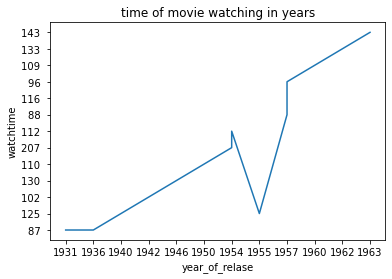

In [71]:
plt.plot(df1['year_of_relase'],df1['watchtime'])
plt.xlabel('year_of_relase')
plt.ylabel('watchtime')
plt.title('time of movie watching in years')

C:\Users\VENATI~1\AppData\Local\Temp/ipykernel_18968/2179259687.py:1: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(df1['year_of_relase'],df1['movie_rating'],'r-',linewidth=3,marker='o',linestyle='dashed',markerfacecolor='Black')


Text(0.5, 1.0, 'Movies Rating In Different Years')

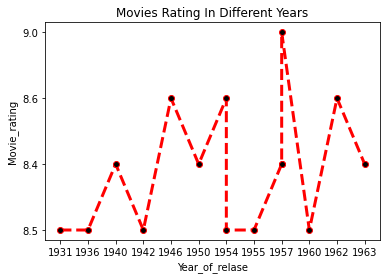

In [72]:
plt.plot(df1['year_of_relase'],df1['movie_rating'],'r-',linewidth=3,marker='o',linestyle='dashed',markerfacecolor='Black')
plt.xlabel('Year_of_relase')
plt.ylabel('Movie_rating')
plt.title('Movies Rating In Different Years')

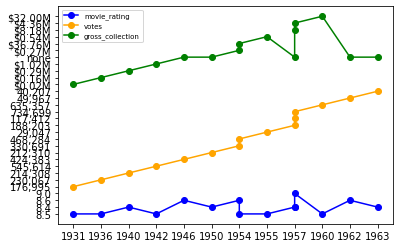

In [77]:
plt.plot(df1['year_of_relase'],df1['movie_rating'],label='movie_rating',color='blue',marker='o')
plt.plot(df1['year_of_relase'],df1['votes'],label='votes',color='orange',marker='o')
plt.plot(df1['year_of_relase'],df1['gross_collection'],label='gross_collection',color='green',marker='o')
plt.legend(loc='upper left',fontsize=7)

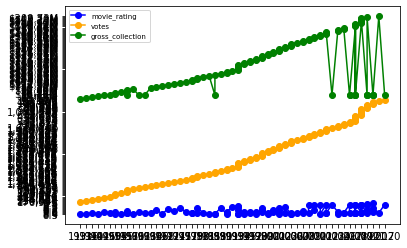

In [78]:
plt.plot(df['year_of_relase'],df['movie_rating'],label='movie_rating',color='blue',marker='o')
plt.plot(df['year_of_relase'],df['votes'],label='votes',color='orange',marker='o')
plt.plot(df['year_of_relase'],df['gross_collection'],label='gross_collection',color='green',marker='o')
plt.legend(loc='upper left',fontsize=7)